<a href="https://colab.research.google.com/github/RodolfoFigueroa/madi2022-1/blob/main/Unidad_1/6_NetworkX_para_graficas_planares_y_digraficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
from collections import deque

En esta sesión veremos cómo trabajar aspectos de planaridad y gráficas dirigidas usando la librería NetworkX.

# DFS y BFS

Como las gráficas ahora son dirigidas, hay que tomar en consideración la dirección de las aristas si queremos recorrerlas con DFS o BFS. Por suerte, en el caso de gráficas dirigidas, `g.adj[i]` solo regresa los vértices sucesores de `i`:

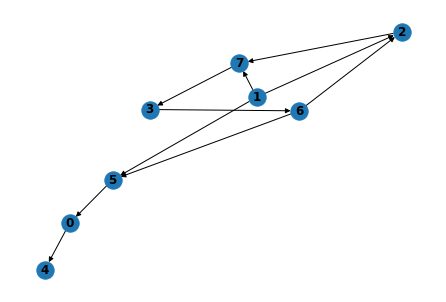

In [69]:
G = nx.gnp_random_graph(8, 0.2, directed=True)
nx.draw(G, with_labels=True, font_weight='bold')

In [70]:
print(f"Vértices adyacentes a 0: {G.adj[0]}")

Vértices adyacentes a 0: {4: {}}


De esta manera, podemos utilizar los algoritmos de DFS y BFS que escribimos en libretas pasadas sin hacer ningún cambio:

In [136]:
def dfs(g, v, visited=None):
    if visited is None:
        visited = [False] * len(g.nodes)
        
    visited[v] = True
    print(v)
    for u in g.adj[v]:
        if not visited[u]:
            dfs(g, u, visited)
            

def bfs(g, v):
    visited = [False] * len(g.nodes)
    q = deque()
    visited[v] = True
    q.append(v)
    
    while(q):
        u = q.popleft()
        print(u)
        for w in g.adj[u]:
            if not visited[w]:
                visited[w] = True
                q.append(w)

# Propiedades

`networkx` tiene varias funciones para obtener distintas propiedades de las gráficas:

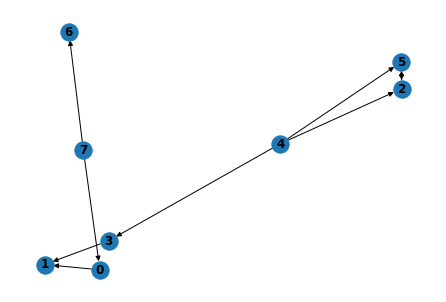

In [53]:
G = nx.gnp_random_graph(8, 0.2, directed=True)
nx.draw(G, with_labels=True, font_weight='bold')

In [56]:
print(
f"""Los vértices de la digráfica son : {G.nodes}
Las aristas de la digráfica son: {G.edges}
Lista de los ingrados por cada vértice: {G.in_degree}
Lista de los exgrados por cada vértice: {G.out_degree}
Ingrado de un vértice en particular: {G.in_degree[1]}
Lista de vértices adyacentes a 1: {list(G.successors(1))}
Lista de vértices adyacentes a 1, con atributos: {G.adj[1]}
Lista de aristas que entran a 2: {G.in_edges(2)}
Lista de predecesores de 2: {list(G.predecessors(2))}"""
)

Los vértices de la digráfica son : [0, 1, 2, 3, 4, 5, 6, 7]
Las aristas de la digráfica son: [(0, 1), (2, 5), (3, 1), (4, 2), (4, 3), (4, 5), (5, 2), (7, 0), (7, 6)]
Lista de los ingrados por cada vértice: [(0, 1), (1, 2), (2, 2), (3, 1), (4, 0), (5, 2), (6, 1), (7, 0)]
Lista de los exgrados por cada vértice: [(0, 1), (1, 0), (2, 1), (3, 1), (4, 3), (5, 1), (6, 0), (7, 2)]
Ingrado de un vértice en particular: 2
Lista de vértices adyacentes a 1: []
Lista de vértices adyacentes a 1, con atributos: {}
Lista de aristas que entran a 2: [(4, 2), (5, 2)]
Lista de predecesores de 2: [4, 5]


# Accesibilidad y conexidad

Decimos que un vértice $v$ es **accesible** desde $u$ si existe un camino *dirigido* entre $u$ y $v$. Es importante notar dos cosas:

1. $u$ y $v$ pueden estar en la misma componente conexa, pero no ser accesibles uno desde el otro.

2. Que $v$ sea accesible desde $u$ no implica lo inverso.

A continuación, demostramos dos gráficas que ilustran estos puntos:

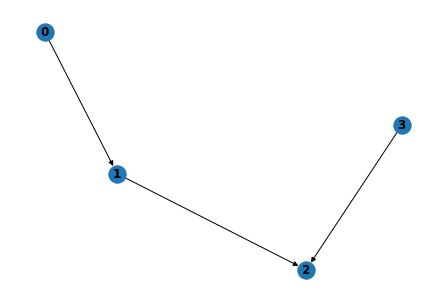

In [67]:
g = nx.DiGraph()
g.add_edges_from([(0,1), (1,2), (3,2)])
nx.draw(g, with_labels=True, font_weight='bold')

Podemos ver que todos los vértices están conectados, pero 0 no es accesible desde 3, y viceversa.

Por otro lado:

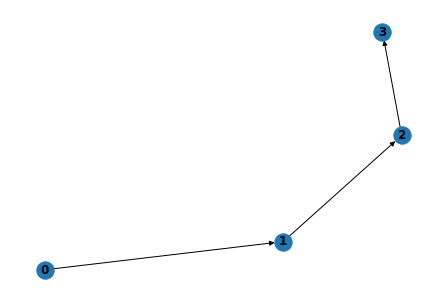

In [68]:
g = nx.DiGraph()
g.add_edges_from([(0,1), (1,2), (2,3)])
nx.draw(g, with_labels=True, font_weight='bold')

3 es accesible desde 0, pero no lo opuesto.

Se dice que $u$ y $v$ están *fuertemente conectados* si $u$ es accesible desde $v$, y $v$ desde $u$. Si cada par de vértices de una gráfica está fuertemente conectado, se dice que la gráfica entera es fuertemente conexa.

Para determinar si $v$ es accesible desde $u$, basta con hacer DFS usando $u$ como el nodo raíz. Si eventualmente visitamos a $v$, significa que sí lo es:

In [78]:
def is_reachable(g, start, end, visited=None):
    if visited is None:
        visited = [False] * len(g.nodes)
        
    visited[start] = True
    for u in g.adj[start]:
        if not visited[u]:
            is_reachable(g, u, end, visited)
    return visited[end]

Usando nuestra gráfica anterior:

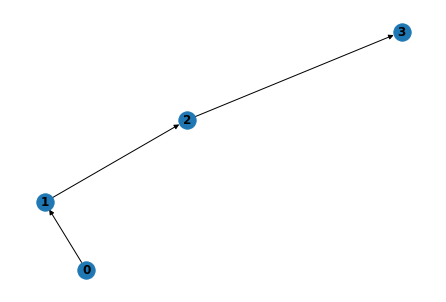

In [83]:
g = nx.DiGraph()
g.add_edges_from([(0,1), (1,2), (2,3)])
nx.draw(g, with_labels=True, font_weight='bold')

In [222]:
print(f"3 es accesible desde 0: {is_reachable(g, 0, 3)}")
print(f"0 es accesible desde 3: {is_reachable(g, 3, 0)}")

3 es accesible desde 0: True
0 es accesible desde 3: False


# Ordenamientos topológicos

Un ordenamiento de los vértices de una gráfica dirigida cumple que, si existe una arista del vértice $u$ al vértice $v$, entonces $u$ viene antes de $v$ en el ordenamiento.

Por ejemplo, tomando la siguiente gráfica:

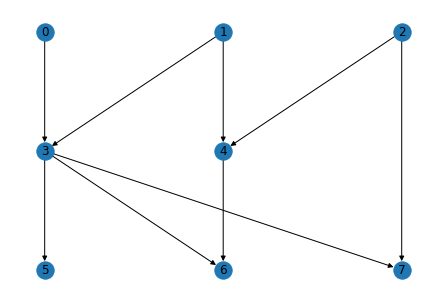

In [11]:
g = nx.DiGraph()
g.add_nodes_from([0,1,2,3,4,5,6,7])
g.add_edges_from([(0,3), (1,3), (1,4), (2,4), (2,7), (3,5), (3,6), (3,7), (4,6)])
pos = {i: (i%3, 3-i//3*3) for i in g.nodes}
pos[5], pos[6], pos[7] = [0,-3], [1,-3], [2,-3]
nx.draw(g, with_labels=True, pos=pos)

Algunos ordenamientos posibles son:

* 0, 1, 2, 3, 4, 5, 6, 7

* 2, 0, 1, 4, 3, 5, 6, 7

* 0, 1, 2, 4, 3, 7, 6, 5

* 3,0,1,2,4,5,6,7,8 (no valido)

Una manera sencilla de comprobar si un ordenamiento es válido es colocar a todos los vértices en una fila, siguiendo el ordenamiento de izquierda a derecha. Si todas las aristas apuntan hacia la derecha, entonces es válido.

Definimos una pequeña función para generar un arreglo de posiciones para graficar dado un posible ordenamiento:

In [224]:
def pos_order(order):
    pos = {}
    for i, p in enumerate(order):
        pos[p] = (i,0)
    return pos

Aplicándolo a nuestros ordenamientos:

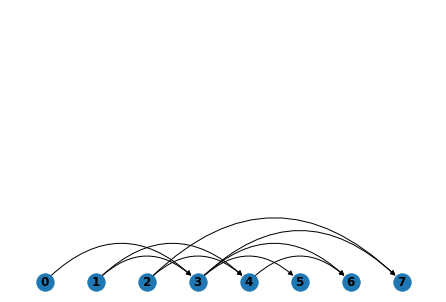

In [225]:
pos = pos_order([0,1,2,3,4,5,6,7,8])
nx.draw(g, pos=pos, connectionstyle="arc3,rad=-0.5", with_labels=True, font_weight='bold')

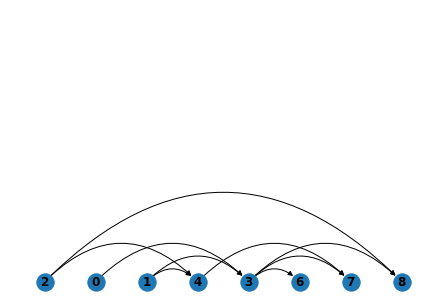

In [132]:
pos = pos_order([2,0,1,4,3,6,7,8])
nx.draw(g, pos=pos, connectionstyle="arc3,rad=-0.5", with_labels=True, font_weight='bold')

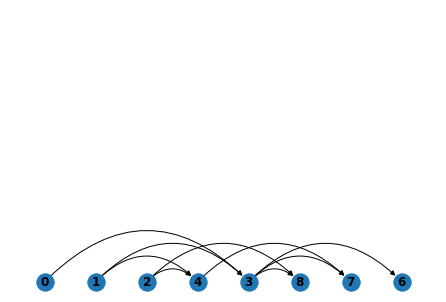

In [133]:
pos = pos_order([0,1,2,4,3,8,7,6])
nx.draw(g, pos=pos, connectionstyle="arc3,rad=-0.5", with_labels=True, font_weight='bold')

Aplicándolo a un ordenamiento inválido:

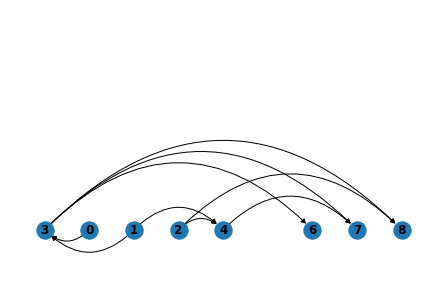

In [134]:
pos = pos_order([3,0,1,2,4,5,6,7,8])
nx.draw(g, pos=pos, connectionstyle="arc3,rad=-0.5", with_labels=True, font_weight='bold')

## Ciclos

Supongamos que tenemos una gráfica un ciclo de la forma $0\rightarrow 1 \rightarrow 2 \rightarrow 0$. Si queremos generar un ordenamiento para esta gráfica, tendremos un problema, ya que por definición $0$ tiene que venir antes que $1$, $1$ antes que $2$, y $2$ antes que $0$, lo cual claramente no es posible.

Por lo tanto, si una gráfica es ordenable, entonces no tiene ciclos. En la siguiente sección, veremos una prueba del converso (i.e., si la gráfica no tiene ciclos entonces es ordenable).

**DAG: Directed acyclic graph**

## DFS y ordenamientos

Como DFS visita cada vértice una única vez, es un candidato natural para generar órdenes topológicos. Tres maneras de listar (no ordenar!) los vértices usándolo son las siguientes:

* **Preorder**: Colocamos el vértice en un queue antes de la llamada recursiva.

* **Postorder**: Colocamos el vértice en un queue después de la llamada recursiva.

* **Reverse postorder**: Colocamos el vértice en un stack después de la llamada recursiva.

Implementamos estos tres métodos en la siguiente sección:

In [4]:
def order(g, v, kind, visited=None, out=None): 
    visited[v] = True
    if kind == 'preorder':
        out.append(v)
    for u in g.adj[v]:
        if not visited[u]:
            order(g, u, kind, visited, out) # recursion
    if kind != 'preorder': # postorder or reverse_postorder
        out.append(v)


def order_handler(g, kind):
    visited = [False] * len(g.nodes)
    out = []
    for n in g.nodes:
        if not visited[n]:
            order(g, n, kind, visited, out)
            
    if kind == 'reverse_postorder':
        return out[::-1]
    else:
        return out

In [221]:
print(f"""Preorder: {order_handler(g, 'preorder')}
Postorder: {order_handler(g, 'postorder')}
Reverse postorder: {order_handler(g, 'reverse_postorder')}""")

Preorder: [0, 3, 5, 6, 7, 1, 4, 2]
Postorder: [5, 6, 7, 3, 0, 4, 1, 2]
Reverse postorder: [2, 1, 4, 0, 3, 7, 6, 5]


**Proposición:** Reverse postorder genera un ordenamiento topológico para una gráfica acíclica.

**Demostración:** Consideremos una arista $v\rightarrow w$. Uno de los tres casos siguientes debe de cumplirse cuando invocamos `dfs(v)`:

1. `dfs(w)` ya fue invocado (i.e., $w$ ya fue visitado).

2. `dfs(w)` no ha sido invocado ($w$ no visitado). Entonces $v \rightarrow w$ hará que `dfs(w)` sea invocado (y regrese) antes de que `dfs(v)` regrese.

3. `dfs(w)` ha sido invocado, y no ha regresado al momento de que `dfs(v)` es invocado. Esto implica que existe un camino $w \rightarrow v$, pero como asumimos que existía una arista $v \rightarrow w$, esto a su vez implica que la gráfica tiene un ciclo, lo cual es imposible.

Por lo tanto, solo los casos 1 y 2 son posibles. En ambos, `dfs(w)` ocurre antes que `dfs(v)`, entonces $w$ aparece *antes* de $v$ en postorder, y después de $v$ en reverse postorder. Por lo tanto, cada arista $v\rightarrow w$ 

# Gráficas planares

NetworkX tiene funciones ya integradas que nos permiten tanto checar si la gráfica es aplanable o no, y también nos muestra un encaje de la gráfica en caso de que esta sea aplanable.

[True, <networkx.algorithms.planarity.PlanarEmbedding object at 0x7f7b54aaac18>]
Aplanable


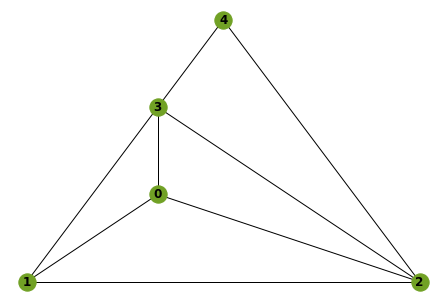

In [ ]:
a = 5
b = 0.8
PL = nx.gnp_random_graph(a, b)

if nx.check_planarity(PL)[0]:
    print("Aplanable")
    nx.draw_planar(PL, with_labels=True, font_weight='bold')
else:
    print("No es aplanable")
    nx.draw(PL, with_labels=True, font_weight='bold')

# Ejercicios

## Ejercicio 1

Definimos un *torneo* de tamaño $n$ como una gráfica con $n$ vértices en la que cada par de vértices está conectado por una única arista dirigida; en otras palabras, la gráfica que obtenemos al asignarle una dirección a cada arista de la gráfica completa $K_n$. Se llama "torneo" porque podemos interpretar la gráfica como los resultados de un torneo entre equipos $1$ hasta $n$, donde hay una arista entre $i$ y $j$ si $i$ le ganó a $j$.

Decimos que un torneo es *transitivo* si se cumple que $((i\rightarrow j)\wedge (j\rightarrow k))\Rightarrow (i\rightarrow k)$, es decir, si $i$ le gana a $j$, y $j$ le gana a $k$, entonces $i$ le gana a $k$.
    
Escribe una función para generar un torneo transitivo aleatorio de $n$ equipos, y otra para comprobar si una gráfica arbitraria es un torneo transitivo válido.


In [1]:
import random
import networkx as nx
from collections import deque

In [2]:
def create_torneo(n):
    vertices = range(n)
    dg = nx.DiGraph()
    dg.add_nodes_from(vertices)
    choice = [False] * n
    
    u = random.randint(0, n-1)
    while(False in choice):
        choice[u] = True
        for v in vertices:
            if u != v and (choice[v] is False):
                dg.add_edge(u, v)  
        u = random.randint(0, n-1)

    nx.draw(dg, with_labels=True, font_weight='bold')
    return dg


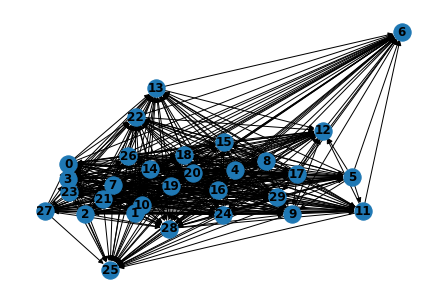

In [6]:
dgt = create_torneo(30)

Escribe una función para generar un torneo transitivo aleatorio de  𝑛  equipos, y otra para comprobar si una gráfica arbitraria es un torneo transitivo válido.

In [11]:
def is_torneo_transitivo(dgt):    
    flag = False
    for first_arista in dgt.edges:
        for second_arista in dgt.edges:        
            if first_arista[1] == second_arista[0]:
                if not ((first_arista[0], second_arista[1]) in dgt.edges):
                    print(first_arista)
                    print(second_arista)
                    return False
    return True                                                    

In [10]:
if is_torneo_transitivo(dgt):
    print("Es un torneo transitivo")
else:
    print("No es un torneo transitivo")

Es un torneo transitivo


## Ejercicio 2

Dada una gráfica $G$, escribe una función para comprobar si un ordenamiento topológico arbitrario de sus vértices es válido.

In [12]:
def check_ordenamiento(g, ordenamiento):
    for u in ordenamiento:
        first = ordenamiento.index(u)
        for v in g.adj[u]:
            second = ordenamiento.index(v)
            if not first < second:
                return False
    return True

In [20]:
if check_ordenamiento(g, [0, 1, 2, 3, 4, 5, 6, 7]):
    print("Ordenamiento topologico valido")
else:
    print("Ordenamiento topologico invalido")

Ordenamiento topologico valido
